In [35]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [36]:
# Files
teams_path = 'Resources/MTeams.csv'
rankings_path = 'Resources/MMasseyOrdinals.csv'
results_path = 'Resources/MRegularSeasonCompactResults.csv'
sample_path = 'Resources/MSampleSubmissionStage2.csv'

In [37]:
# Teams raw DF
teams_df=pd.read_csv(teams_path)
print(teams_df.shape)
teams_df.head()

(372, 4)


,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2022
1,1102,Air Force,1985,2022
2,1103,Akron,1985,2022
3,1104,Alabama,1985,2022
4,1105,Alabama A&M,2000,2022


In [38]:
# Rankings raw DF
rankings_df=pd.read_csv(rankings_path)
print(rankings_df.shape)
rankings_df.head()

(4521720, 5)


,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260


In [39]:
# Checking ranking systems
rankings_df['SystemName'].value_counts()

SAG    122047
MOR    121057
POM    118566
DOK    105270
WLK     97047
        ...  
CRW       351
HRN       351
PMC       351
BP5       345
PH        326
Name: SystemName, Length: 187, dtype: int64

In [40]:
# We need to get just SAG ranks for simplicity
SAG_ranks = rankings_df.loc[rankings_df['SystemName']=='SAG']
SAG_ranks.head()

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
3622,2003,37,SAG,1102,114
3623,2003,37,SAG,1103,193
3624,2003,37,SAG,1104,11
3625,2003,37,SAG,1105,310
3626,2003,37,SAG,1106,257


In [7]:
# This is good for now - but we'll need to look up the OrdinalRank by TeamID and 
# load that into Results for the DayNum (results) corresponding to RankingDayNum

In [41]:
# Results raw DF
raw_results_df=pd.read_csv(results_path)
print(raw_results_df.shape)
raw_results_df.head()

(174471, 8)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [43]:
# We want to drop years before 2003, because rankings go to 2003
results_df = raw_results_df[raw_results_df['Season']==2003]
results_df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
74048,2003,10,1104,68,1328,62,N,0
74049,2003,10,1272,70,1393,63,N,0
74050,2003,11,1266,73,1437,61,N,0
74051,2003,11,1296,56,1457,50,N,0
74052,2003,11,1400,77,1208,71,N,0


In [44]:
# Make a new column in SAG_Ranks called 'Season_Day_Team' that we will repeat in Results 

SAG_ranks['Season-Day-Team'] = SAG_ranks['Season'].map(str) + '-' + SAG_ranks['RankingDayNum'].map(str) + '-' + SAG_ranks['TeamID'].map(str)
SAG_ranks.head()

C:\Users\gkmb2\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Season,RankingDayNum,SystemName,TeamID,OrdinalRank,Season-Day-Team
3622,2003,37,SAG,1102,114,2003-37-1102
3623,2003,37,SAG,1103,193,2003-37-1103
3624,2003,37,SAG,1104,11,2003-37-1104
3625,2003,37,SAG,1105,310,2003-37-1105
3626,2003,37,SAG,1106,257,2003-37-1106


In [45]:
# Make new columns in SAG_Ranks called 'RankingWeek' and 'Season_Week_Team' because rankings only come out weekly

SAG_ranks['RankingWeek'] = (SAG_ranks['RankingDayNum']/7).round(decimals=0)

SAG_ranks['Season-Week-Team'] = SAG_ranks['Season'].map(str) + '-' + SAG_ranks['RankingWeek'].map(str) + '-' + SAG_ranks['TeamID'].map(str)
SAG_ranks.head()

C:\Users\gkmb2\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gkmb2\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Season,RankingDayNum,SystemName,TeamID,OrdinalRank,Season-Day-Team,RankingWeek,Season-Week-Team
3622,2003,37,SAG,1102,114,2003-37-1102,5.0,2003-5.0-1102
3623,2003,37,SAG,1103,193,2003-37-1103,5.0,2003-5.0-1103
3624,2003,37,SAG,1104,11,2003-37-1104,5.0,2003-5.0-1104
3625,2003,37,SAG,1105,310,2003-37-1105,5.0,2003-5.0-1105
3626,2003,37,SAG,1106,257,2003-37-1106,5.0,2003-5.0-1106


In [46]:
# Make a new column in Results called 'WSeason_Day_Team' & 'LSeason_Day_Team' that we'll use for potential indices

results_df['WSeason-Day-Team'] = results_df['Season'].map(str) + '-' + results_df['DayNum'].map(str) + '-' + results_df['WTeamID'].map(str)
results_df['LSeason-Day-Team'] = results_df['Season'].map(str) + '-' + results_df['DayNum'].map(str) + '-' + results_df['LTeamID'].map(str)
results_df.head()

C:\Users\gkmb2\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gkmb2\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeason-Day-Team,LSeason-Day-Team
74048,2003,10,1104,68,1328,62,N,0,2003-10-1104,2003-10-1328
74049,2003,10,1272,70,1393,63,N,0,2003-10-1272,2003-10-1393
74050,2003,11,1266,73,1437,61,N,0,2003-11-1266,2003-11-1437
74051,2003,11,1296,56,1457,50,N,0,2003-11-1296,2003-11-1457
74052,2003,11,1400,77,1208,71,N,0,2003-11-1400,2003-11-1208


In [47]:
# Make a new column in Results called 'WSeason_Week_Team' & 'LSeason_Week_Team' that we'll use for loc to pull in OrdinalRank for winning and losing team

results_df['WeekNum'] = (results_df['DayNum']/7).round(decimals=0)

results_df['WSeason-Week-Team'] = results_df['Season'].map(str) + '-' + results_df['WeekNum'].map(str) + '-' + results_df['WTeamID'].map(str)
results_df['LSeason-Week-Team'] = results_df['Season'].map(str) + '-' + results_df['WeekNum'].map(str) + '-' + results_df['LTeamID'].map(str)
results_df.head()

C:\Users\gkmb2\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gkmb2\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\gkmb2\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeason-Day-Team,LSeason-Day-Team,WeekNum,WSeason-Week-Team,LSeason-Week-Team
74048,2003,10,1104,68,1328,62,N,0,2003-10-1104,2003-10-1328,1.0,2003-1.0-1104,2003-1.0-1328
74049,2003,10,1272,70,1393,63,N,0,2003-10-1272,2003-10-1393,1.0,2003-1.0-1272,2003-1.0-1393
74050,2003,11,1266,73,1437,61,N,0,2003-11-1266,2003-11-1437,2.0,2003-2.0-1266,2003-2.0-1437
74051,2003,11,1296,56,1457,50,N,0,2003-11-1296,2003-11-1457,2.0,2003-2.0-1296,2003-2.0-1457
74052,2003,11,1400,77,1208,71,N,0,2003-11-1400,2003-11-1208,2.0,2003-2.0-1400,2003-2.0-1208


In [14]:
# Get winning and losing team rank for that day in our results df

# # Create empty columns
# results_df['WRank'] = "" 
# results_df['LRank'] = ""
# results_df.head()

In [48]:
# Merging winning team rankings on season-week-team. There will be NA's for Rank bc of beginning and end of season

results_df = results_df.merge(SAG_ranks[['Season-Week-Team','OrdinalRank']], how='left', left_on='WSeason-Week-Team', right_on='Season-Week-Team').drop(columns=['Season-Week-Team'])

results_df.sample(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeason-Day-Team,LSeason-Day-Team,WeekNum,WSeason-Week-Team,LSeason-Week-Team,OrdinalRank
2852,2003,89,1285,66,1170,59,H,0,2003-89-1285,2003-89-1170,13.0,2003-13.0-1285,2003-13.0-1170,199.0
823,2003,37,1161,96,1176,80,H,0,2003-37-1161,2003-37-1176,5.0,2003-5.0-1161,2003-5.0-1176,104.0
4131,2003,117,1362,90,1337,82,A,0,2003-117-1362,2003-117-1337,17.0,2003-17.0-1362,2003-17.0-1337,133.0
2272,2003,75,1350,75,1182,69,A,0,2003-75-1350,2003-75-1182,11.0,2003-11.0-1350,2003-11.0-1182,57.0
4165,2003,117,1455,71,1283,65,A,0,2003-117-1455,2003-117-1283,17.0,2003-17.0-1455,2003-17.0-1283,119.0
1665,2003,61,1379,56,1293,54,H,0,2003-61-1379,2003-61-1293,9.0,2003-9.0-1379,2003-9.0-1293,154.0
851,2003,39,1235,73,1234,69,A,0,2003-39-1235,2003-39-1234,6.0,2003-6.0-1235,2003-6.0-1234,49.0
4035,2003,117,1103,85,1245,70,A,0,2003-117-1103,2003-117-1245,17.0,2003-17.0-1103,2003-17.0-1245,156.0
3014,2003,93,1257,77,1153,71,H,0,2003-93-1257,2003-93-1153,13.0,2003-13.0-1257,2003-13.0-1153,1.0
3227,2003,96,1439,71,1385,54,A,0,2003-96-1439,2003-96-1385,14.0,2003-14.0-1439,2003-14.0-1385,149.0


In [49]:
# Rename OrdinalRank to WRank
results_df.rename(columns={'OrdinalRank': 'WRank'},inplace=True)
results_df.sample(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeason-Day-Team,LSeason-Day-Team,WeekNum,WSeason-Week-Team,LSeason-Week-Team,WRank
4139,2003,117,1376,76,1435,64,H,0,2003-117-1376,2003-117-1435,17.0,2003-17.0-1376,2003-17.0-1435,75.0
1000,2003,43,1397,63,1149,49,H,0,2003-43-1397,2003-43-1149,6.0,2003-6.0-1397,2003-6.0-1149,82.0
2430,2003,80,1143,73,1425,68,H,0,2003-80-1143,2003-80-1425,11.0,2003-11.0-1143,2003-11.0-1425,37.0
1283,2003,54,1131,84,1199,69,N,0,2003-54-1131,2003-54-1199,8.0,2003-8.0-1131,2003-8.0-1199,92.0
712,2003,33,1293,83,1443,72,H,0,2003-33-1293,2003-33-1443,5.0,2003-5.0-1293,2003-5.0-1443,92.0
1543,2003,59,1330,67,1406,56,H,0,2003-59-1330,2003-59-1406,8.0,2003-8.0-1330,2003-8.0-1406,144.0
2808,2003,89,1161,72,1361,69,A,0,2003-89-1161,2003-89-1361,13.0,2003-13.0-1161,2003-13.0-1361,100.0
3197,2003,96,1380,87,1212,68,H,0,2003-96-1380,2003-96-1212,14.0,2003-14.0-1380,2003-14.0-1212,323.0
2536,2003,82,1254,73,1420,72,H,1,2003-82-1254,2003-82-1420,12.0,2003-12.0-1254,2003-12.0-1420,264.0
4033,2003,116,1347,81,1251,56,H,0,2003-116-1347,2003-116-1251,17.0,2003-17.0-1347,2003-17.0-1251,300.0


In [50]:
# Merging losing team rankings on season-week-team. There will be NA's for Rank bc of beginning and end of season

results_df = results_df.merge(SAG_ranks[['Season-Week-Team','OrdinalRank']], how='left', left_on='LSeason-Week-Team', right_on='Season-Week-Team').drop(columns=['Season-Week-Team'])

results_df.sample(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeason-Day-Team,LSeason-Day-Team,WeekNum,WSeason-Week-Team,LSeason-Week-Team,WRank,OrdinalRank
666,2003,33,1170,73,1142,66,A,0,2003-33-1170,2003-33-1142,5.0,2003-5.0-1170,2003-5.0-1142,247.0,309.0
3597,2003,106,1222,46,1379,42,H,0,2003-106-1222,2003-106-1379,15.0,2003-15.0-1222,2003-15.0-1379,216.0,176.0
2315,2003,75,1457,67,1189,60,A,0,2003-75-1457,2003-75-1189,11.0,2003-11.0-1457,2003-11.0-1189,222.0,297.0
537,2003,29,1191,81,1443,76,H,0,2003-29-1191,2003-29-1443,4.0,2003-4.0-1191,2003-4.0-1443,NaN,NaN
3130,2003,96,1186,87,1285,72,H,0,2003-96-1186,2003-96-1285,14.0,2003-14.0-1186,2003-14.0-1285,97.0,192.0
3458,2003,103,1193,67,1265,56,H,0,2003-103-1193,2003-103-1265,15.0,2003-15.0-1193,2003-15.0-1265,138.0,234.0
3119,2003,96,1163,84,1344,68,A,0,2003-96-1163,2003-96-1344,14.0,2003-14.0-1163,2003-14.0-1344,40.0,74.0
1984,2003,68,1385,80,1417,65,A,0,2003-68-1385,2003-68-1417,10.0,2003-10.0-1385,2003-10.0-1417,67.0,167.0
2718,2003,86,1412,84,1395,82,H,0,2003-86-1412,2003-86-1395,12.0,2003-12.0-1412,2003-12.0-1395,90.0,161.0
668,2003,33,1173,59,1423,48,H,0,2003-33-1173,2003-33-1423,5.0,2003-5.0-1173,2003-5.0-1423,50.0,88.0


In [51]:
# Rename OrdinalRank to LRank
results_df.rename(columns={'OrdinalRank': 'LRank'},inplace=True)
results_df.sample(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeason-Day-Team,LSeason-Day-Team,WeekNum,WSeason-Week-Team,LSeason-Week-Team,WRank,LRank
4572,2003,130,1277,54,1345,42,N,0,2003-130-1277,2003-130-1345,19.0,2003-19.0-1277,2003-19.0-1345,36.0,34.0
3161,2003,96,1277,67,1231,62,A,1,2003-96-1277,2003-96-1231,14.0,2003-14.0-1277,2003-14.0-1231,39.0,34.0
4569,2003,130,1246,81,1435,63,N,0,2003-130-1246,2003-130-1435,19.0,2003-19.0-1246,2003-19.0-1435,1.0,94.0
438,2003,26,1400,78,1371,61,N,0,2003-26-1400,2003-26-1371,4.0,2003-4.0-1400,2003-4.0-1371,NaN,NaN
1593,2003,61,1142,83,1415,77,H,0,2003-61-1142,2003-61-1415,9.0,2003-9.0-1142,2003-9.0-1415,228.0,294.0
1117,2003,47,1196,94,1274,93,N,2,2003-47-1196,2003-47-1274,7.0,2003-7.0-1196,2003-7.0-1274,21.0,143.0
3587,2003,105,1461,64,1102,57,A,0,2003-105-1461,2003-105-1102,15.0,2003-15.0-1461,2003-15.0-1102,66.0,133.0
1466,2003,56,1414,87,1194,70,H,0,2003-56-1414,2003-56-1194,8.0,2003-8.0-1414,2003-8.0-1194,101.0,254.0
894,2003,40,1277,71,1246,67,A,0,2003-40-1277,2003-40-1246,6.0,2003-6.0-1277,2003-6.0-1246,22.0,21.0
3060,2003,94,1258,86,1339,71,H,0,2003-94-1258,2003-94-1339,13.0,2003-13.0-1258,2003-13.0-1339,221.0,197.0


In [52]:
# Getting ranking differential to use as a variable - negative values are underdog wins
results_df['RankDiff'] = results_df['WRank'] - results_df['LRank']
results_df['RankDiff'] = results_df['RankDiff'].abs()

# Getting Score differential just in case
results_df['Spread'] = results_df['WScore'] - results_df['LScore']

# Outcome column for if high rank team (favorite) won
results_df['FavWin'] = np.where((results_df['WRank'] < results_df['LRank']), 1, 0)

results_df.sample(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeason-Day-Team,LSeason-Day-Team,WeekNum,WSeason-Week-Team,LSeason-Week-Team,WRank,LRank,RankDiff,Spread,FavWin
3165,2003,96,1286,60,1340,56,A,0,2003-96-1286,2003-96-1340,14.0,2003-14.0-1286,2003-14.0-1340,207.0,281.0,74.0,4,1
808,2003,36,1260,86,1282,75,H,0,2003-36-1260,2003-36-1282,5.0,2003-5.0-1260,2003-5.0-1282,144.0,298.0,154.0,11,1
700,2003,33,1261,93,1270,72,H,0,2003-33-1261,2003-33-1270,5.0,2003-5.0-1261,2003-5.0-1270,86.0,149.0,63.0,21,1
2712,2003,86,1353,68,1393,65,H,0,2003-86-1353,2003-86-1393,12.0,2003-12.0-1353,2003-12.0-1393,132.0,19.0,113.0,3,0
393,2003,26,1217,56,1392,45,A,0,2003-26-1217,2003-26-1392,4.0,2003-4.0-1217,2003-4.0-1392,NaN,NaN,NaN,11,0
3896,2003,112,1366,67,1289,58,H,0,2003-112-1366,2003-112-1289,16.0,2003-16.0-1366,2003-16.0-1289,326.0,322.0,4.0,9,0
1856,2003,66,1390,57,1333,54,H,0,2003-66-1390,2003-66-1333,9.0,2003-9.0-1390,2003-9.0-1333,32.0,176.0,144.0,3,1
3147,2003,96,1250,68,1298,46,H,0,2003-96-1250,2003-96-1298,14.0,2003-14.0-1250,2003-14.0-1298,194.0,278.0,84.0,22,1
570,2003,30,1132,76,1138,59,H,0,2003-30-1132,2003-30-1138,4.0,2003-4.0-1132,2003-4.0-1138,NaN,NaN,NaN,17,0
3546,2003,103,1441,61,1440,58,A,0,2003-103-1441,2003-103-1440,15.0,2003-15.0-1441,2003-15.0-1440,271.0,290.0,19.0,3,1


In [53]:
# Drop NA's for a nice and pretty DF

clean_results_df = results_df.dropna()

clean_results_df

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeason-Day-Team,LSeason-Day-Team,WeekNum,WSeason-Week-Team,LSeason-Week-Team,WRank,LRank,RankDiff,Spread,FavWin
632,2003,32,1110,73,1347,49,H,0,2003-32-1110,2003-32-1347,5.0,2003-5.0-1110,2003-5.0-1347,204.0,300.0,96.0,24,1
633,2003,32,1127,74,1176,69,N,0,2003-32-1127,2003-32-1176,5.0,2003-5.0-1127,2003-5.0-1176,225.0,212.0,13.0,5,0
634,2003,32,1156,81,1271,61,H,0,2003-32-1156,2003-32-1271,5.0,2003-5.0-1156,2003-5.0-1271,189.0,318.0,129.0,20,1
635,2003,32,1159,87,1306,68,H,0,2003-32-1159,2003-32-1306,5.0,2003-5.0-1159,2003-5.0-1306,289.0,316.0,27.0,19,1
636,2003,32,1162,58,1119,44,H,0,2003-32-1162,2003-32-1119,5.0,2003-5.0-1162,2003-5.0-1119,321.0,323.0,2.0,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4611,2003,131,1436,56,1131,55,A,0,2003-131-1436,2003-131-1131,19.0,2003-19.0-1436,2003-19.0-1131,158.0,132.0,26.0,1,0
4612,2003,132,1181,84,1301,77,N,0,2003-132-1181,2003-132-1301,19.0,2003-19.0-1181,2003-19.0-1301,10.0,46.0,36.0,7,1
4613,2003,132,1228,72,1326,59,N,0,2003-132-1228,2003-132-1326,19.0,2003-19.0-1228,2003-19.0-1326,11.0,72.0,61.0,13,1
4614,2003,132,1246,64,1280,57,N,0,2003-132-1246,2003-132-1280,19.0,2003-19.0-1246,2003-19.0-1280,1.0,16.0,15.0,7,1


In [22]:
#clean_results_df.to_csv('resources/clean_results_df.csv')

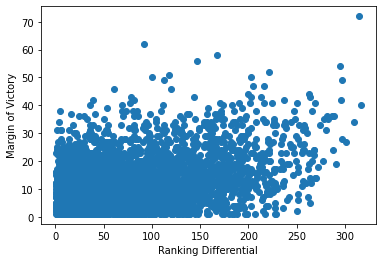

In [54]:
# Look at rank diff and spread

plt.scatter(clean_results_df['RankDiff'],clean_results_df['Spread'])
plt.xlabel('Ranking Differential')
plt.ylabel('Margin of Victory')
plt.show()

In [55]:
# X = ranks, y = win?

y = clean_results_df['FavWin']
X = clean_results_df[['RankDiff','Spread']]

In [71]:
# Do TTS 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=5)
X_train.shape

(2988, 2)

In [72]:
# Train
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=15)

classifier.fit(X_train, y_train)
print(classifier.fit(X_train, y_train))

LogisticRegression(max_iter=200, random_state=15)


In [73]:
y_pred = classifier.predict(X_test)
predictions = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
predictions

,Prediction,Actual
0,1,1
1,1,1
2,1,0
3,1,1
4,1,1
...,...,...
991,1,0
992,1,1
993,1,1
994,1,1


In [30]:
for x in range(0, 3):
    y = clean_results_df['FavWin']
    X = clean_results_df[['RankDiff','Spread']]
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
    X_train.shape
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression(solver='liblinear',
                                max_iter=200,
                                random_state=10)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    predictions = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
    predictions
    
    

In [63]:
for i,j in clean_results_df[['WTeamID','RankDiff','Spread']].iterrows():
    print(i,j)
    print()

632 WTeamID     1110.0
RankDiff      96.0
Spread        24.0
Name: 632, dtype: float64

633 WTeamID     1127.0
RankDiff      13.0
Spread         5.0
Name: 633, dtype: float64

634 WTeamID     1156.0
RankDiff     129.0
Spread        20.0
Name: 634, dtype: float64

635 WTeamID     1159.0
RankDiff      27.0
Spread        19.0
Name: 635, dtype: float64

636 WTeamID     1162.0
RankDiff       2.0
Spread        14.0
Name: 636, dtype: float64

637 WTeamID     1196.0
RankDiff      29.0
Spread         1.0
Name: 637, dtype: float64

638 WTeamID     1234.0
RankDiff     130.0
Spread        21.0
Name: 638, dtype: float64

639 WTeamID     1235.0
RankDiff     186.0
Spread        15.0
Name: 639, dtype: float64

640 WTeamID     1278.0
RankDiff     182.0
Spread        27.0
Name: 640, dtype: float64

641 WTeamID     1283.0
RankDiff      53.0
Spread        31.0
Name: 641, dtype: float64

642 WTeamID     1307.0
RankDiff     125.0
Spread        25.0
Name: 642, dtype: float64

643 WTeamID     1317.0
RankDiff 

Name: 742, dtype: float64

743 WTeamID     1403.0
RankDiff     314.0
Spread        72.0
Name: 743, dtype: float64

744 WTeamID     1404.0
RankDiff     128.0
Spread         9.0
Name: 744, dtype: float64

745 WTeamID     1405.0
RankDiff       1.0
Spread         7.0
Name: 745, dtype: float64

746 WTeamID     1407.0
RankDiff     167.0
Spread         9.0
Name: 746, dtype: float64

747 WTeamID     1411.0
RankDiff      29.0
Spread         5.0
Name: 747, dtype: float64

748 WTeamID     1428.0
RankDiff      20.0
Spread        23.0
Name: 748, dtype: float64

749 WTeamID     1433.0
RankDiff      72.0
Spread         5.0
Name: 749, dtype: float64

750 WTeamID     1435.0
RankDiff     150.0
Spread        20.0
Name: 750, dtype: float64

751 WTeamID     1437.0
RankDiff     112.0
Spread         3.0
Name: 751, dtype: float64

752 WTeamID     1449.0
RankDiff     108.0
Spread        17.0
Name: 752, dtype: float64

753 WTeamID     1451.0
RankDiff     222.0
Spread         9.0
Name: 753, dtype: float64

754 W

Name: 903, dtype: float64

904 WTeamID     1326.0
RankDiff      90.0
Spread        14.0
Name: 904, dtype: float64

905 WTeamID     1328.0
RankDiff     216.0
Spread        22.0
Name: 905, dtype: float64

906 WTeamID     1330.0
RankDiff     192.0
Spread        20.0
Name: 906, dtype: float64

907 WTeamID     1332.0
RankDiff     115.0
Spread        15.0
Name: 907, dtype: float64

908 WTeamID     1333.0
RankDiff     109.0
Spread        13.0
Name: 908, dtype: float64

909 WTeamID     1334.0
RankDiff      20.0
Spread        16.0
Name: 909, dtype: float64

910 WTeamID     1336.0
RankDiff       6.0
Spread        12.0
Name: 910, dtype: float64

911 WTeamID     1338.0
RankDiff     226.0
Spread        34.0
Name: 911, dtype: float64

912 WTeamID     1348.0
RankDiff     133.0
Spread         6.0
Name: 912, dtype: float64

913 WTeamID     1351.0
RankDiff      62.0
Spread        10.0
Name: 913, dtype: float64

914 WTeamID     1353.0
RankDiff      80.0
Spread         6.0
Name: 914, dtype: float64

915 W

Name: 1045, dtype: float64

1046 WTeamID     1174.0
RankDiff      44.0
Spread         3.0
Name: 1046, dtype: float64

1047 WTeamID     1191.0
RankDiff      47.0
Spread        10.0
Name: 1047, dtype: float64

1048 WTeamID     1206.0
RankDiff      89.0
Spread        10.0
Name: 1048, dtype: float64

1049 WTeamID     1217.0
RankDiff      52.0
Spread        12.0
Name: 1049, dtype: float64

1050 WTeamID     1227.0
RankDiff     168.0
Spread        17.0
Name: 1050, dtype: float64

1051 WTeamID     1248.0
RankDiff      51.0
Spread        11.0
Name: 1051, dtype: float64

1052 WTeamID     1272.0
RankDiff      41.0
Spread         7.0
Name: 1052, dtype: float64

1053 WTeamID     1293.0
RankDiff      61.0
Spread        46.0
Name: 1053, dtype: float64

1054 WTeamID     1314.0
RankDiff     133.0
Spread        26.0
Name: 1054, dtype: float64

1055 WTeamID     1344.0
RankDiff      41.0
Spread        29.0
Name: 1055, dtype: float64

1056 WTeamID     1372.0
RankDiff       2.0
Spread        24.0
Name: 1056

Name: 1207, dtype: float64

1208 WTeamID     1337.0
RankDiff     143.0
Spread        16.0
Name: 1208, dtype: float64

1209 WTeamID     1356.0
RankDiff      79.0
Spread        12.0
Name: 1209, dtype: float64

1210 WTeamID     1365.0
RankDiff     127.0
Spread        25.0
Name: 1210, dtype: float64

1211 WTeamID     1375.0
RankDiff     106.0
Spread        20.0
Name: 1211, dtype: float64

1212 WTeamID     1400.0
RankDiff     132.0
Spread         3.0
Name: 1212, dtype: float64

1213 WTeamID     1401.0
RankDiff     190.0
Spread        41.0
Name: 1213, dtype: float64

1214 WTeamID     1414.0
RankDiff      58.0
Spread        12.0
Name: 1214, dtype: float64

1215 WTeamID     1456.0
RankDiff      17.0
Spread         7.0
Name: 1215, dtype: float64

1216 WTeamID     1104.0
RankDiff     131.0
Spread        18.0
Name: 1216, dtype: float64

1217 WTeamID     1152.0
RankDiff      30.0
Spread         5.0
Name: 1217, dtype: float64

1218 WTeamID     1157.0
RankDiff      94.0
Spread        19.0
Name: 1218

Name: 1374, dtype: float64

1375 WTeamID     1114.0
RankDiff     129.0
Spread         7.0
Name: 1375, dtype: float64

1376 WTeamID     1125.0
RankDiff      82.0
Spread        13.0
Name: 1376, dtype: float64

1377 WTeamID     1128.0
RankDiff      82.0
Spread         2.0
Name: 1377, dtype: float64

1378 WTeamID     1133.0
RankDiff      98.0
Spread        27.0
Name: 1378, dtype: float64

1379 WTeamID     1139.0
RankDiff      59.0
Spread         3.0
Name: 1379, dtype: float64

1380 WTeamID     1151.0
RankDiff     223.0
Spread         9.0
Name: 1380, dtype: float64

1381 WTeamID     1152.0
RankDiff      33.0
Spread         3.0
Name: 1381, dtype: float64

1382 WTeamID     1158.0
RankDiff     182.0
Spread        21.0
Name: 1382, dtype: float64

1383 WTeamID     1160.0
RankDiff     139.0
Spread         4.0
Name: 1383, dtype: float64

1384 WTeamID     1166.0
RankDiff     214.0
Spread        23.0
Name: 1384, dtype: float64

1385 WTeamID     1171.0
RankDiff       3.0
Spread         4.0
Name: 1385

Name: 1520, dtype: float64

1521 WTeamID     1180.0
RankDiff     113.0
Spread        20.0
Name: 1521, dtype: float64

1522 WTeamID     1181.0
RankDiff     143.0
Spread        28.0
Name: 1522, dtype: float64

1523 WTeamID     1198.0
RankDiff     126.0
Spread         3.0
Name: 1523, dtype: float64

1524 WTeamID     1206.0
RankDiff      27.0
Spread        10.0
Name: 1524, dtype: float64

1525 WTeamID     1209.0
RankDiff       5.0
Spread        11.0
Name: 1525, dtype: float64

1526 WTeamID     1211.0
RankDiff     247.0
Spread        38.0
Name: 1526, dtype: float64

1527 WTeamID     1218.0
RankDiff     265.0
Spread        12.0
Name: 1527, dtype: float64

1528 WTeamID     1233.0
RankDiff     110.0
Spread         3.0
Name: 1528, dtype: float64

1529 WTeamID     1242.0
RankDiff     221.0
Spread        52.0
Name: 1529, dtype: float64

1530 WTeamID     1243.0
RankDiff       5.0
Spread        17.0
Name: 1530, dtype: float64

1531 WTeamID     1246.0
RankDiff     256.0
Spread        31.0
Name: 1531

Name: 1686, dtype: float64

1687 WTeamID     1449.0
RankDiff       6.0
Spread         4.0
Name: 1687, dtype: float64

1688 WTeamID     1454.0
RankDiff     157.0
Spread        12.0
Name: 1688, dtype: float64

1689 WTeamID     1455.0
RankDiff      55.0
Spread        24.0
Name: 1689, dtype: float64

1690 WTeamID     1456.0
RankDiff      43.0
Spread        19.0
Name: 1690, dtype: float64

1691 WTeamID     1457.0
RankDiff      41.0
Spread        17.0
Name: 1691, dtype: float64

1692 WTeamID     1458.0
RankDiff     251.0
Spread        28.0
Name: 1692, dtype: float64

1693 WTeamID     1461.0
RankDiff     161.0
Spread         4.0
Name: 1693, dtype: float64

1694 WTeamID     1165.0
RankDiff      21.0
Spread         7.0
Name: 1694, dtype: float64

1695 WTeamID     1166.0
RankDiff     212.0
Spread        21.0
Name: 1695, dtype: float64

1696 WTeamID     1172.0
RankDiff     215.0
Spread        14.0
Name: 1696, dtype: float64

1697 WTeamID     1181.0
RankDiff      62.0
Spread        18.0
Name: 1697

Name: 1851, dtype: float64

1852 WTeamID     1369.0
RankDiff      61.0
Spread        16.0
Name: 1852, dtype: float64

1853 WTeamID     1372.0
RankDiff     146.0
Spread        27.0
Name: 1853, dtype: float64

1854 WTeamID     1375.0
RankDiff      54.0
Spread         4.0
Name: 1854, dtype: float64

1855 WTeamID     1381.0
RankDiff     137.0
Spread        15.0
Name: 1855, dtype: float64

1856 WTeamID     1390.0
RankDiff     144.0
Spread         3.0
Name: 1856, dtype: float64

1857 WTeamID     1402.0
RankDiff      44.0
Spread         9.0
Name: 1857, dtype: float64

1858 WTeamID     1404.0
RankDiff      53.0
Spread         2.0
Name: 1858, dtype: float64

1859 WTeamID     1407.0
RankDiff     128.0
Spread         5.0
Name: 1859, dtype: float64

1860 WTeamID     1415.0
RankDiff      16.0
Spread         4.0
Name: 1860, dtype: float64

1861 WTeamID     1426.0
RankDiff      78.0
Spread        15.0
Name: 1861, dtype: float64

1862 WTeamID     1427.0
RankDiff      82.0
Spread         2.0
Name: 1862

Name: 2020, dtype: float64

2021 WTeamID     1106.0
RankDiff      25.0
Spread         6.0
Name: 2021, dtype: float64

2022 WTeamID     1111.0
RankDiff     141.0
Spread         6.0
Name: 2022, dtype: float64

2023 WTeamID     1135.0
RankDiff      77.0
Spread        17.0
Name: 2023, dtype: float64

2024 WTeamID     1147.0
RankDiff      61.0
Spread        11.0
Name: 2024, dtype: float64

2025 WTeamID     1149.0
RankDiff      10.0
Spread         9.0
Name: 2025, dtype: float64

2026 WTeamID     1151.0
RankDiff      12.0
Spread         4.0
Name: 2026, dtype: float64

2027 WTeamID     1161.0
RankDiff     144.0
Spread        16.0
Name: 2027, dtype: float64

2028 WTeamID     1189.0
RankDiff     141.0
Spread         3.0
Name: 2028, dtype: float64

2029 WTeamID     1190.0
RankDiff      47.0
Spread         4.0
Name: 2029, dtype: float64

2030 WTeamID     1192.0
RankDiff      17.0
Spread         5.0
Name: 2030, dtype: float64

2031 WTeamID     1197.0
RankDiff       7.0
Spread        11.0
Name: 2031

2201 WTeamID     1161.0
RankDiff      47.0
Spread         2.0
Name: 2201, dtype: float64

2202 WTeamID     1164.0
RankDiff      20.0
Spread         8.0
Name: 2202, dtype: float64

2203 WTeamID     1165.0
RankDiff      44.0
Spread        13.0
Name: 2203, dtype: float64

2204 WTeamID     1166.0
RankDiff      50.0
Spread         9.0
Name: 2204, dtype: float64

2205 WTeamID     1169.0
RankDiff      47.0
Spread        19.0
Name: 2205, dtype: float64

2206 WTeamID     1172.0
RankDiff     134.0
Spread         8.0
Name: 2206, dtype: float64

2207 WTeamID     1173.0
RankDiff     114.0
Spread        10.0
Name: 2207, dtype: float64

2208 WTeamID     1179.0
RankDiff      13.0
Spread        14.0
Name: 2208, dtype: float64

2209 WTeamID     1180.0
RankDiff     196.0
Spread        29.0
Name: 2209, dtype: float64

2210 WTeamID     1183.0
RankDiff      14.0
Spread         8.0
Name: 2210, dtype: float64

2211 WTeamID     1186.0
RankDiff     186.0
Spread        34.0
Name: 2211, dtype: float64

2212 WTeam

Name: 2380, dtype: float64

2381 WTeamID     1440.0
RankDiff     136.0
Spread         1.0
Name: 2381, dtype: float64

2382 WTeamID     1441.0
RankDiff     183.0
Spread         1.0
Name: 2382, dtype: float64

2383 WTeamID     1442.0
RankDiff      23.0
Spread         9.0
Name: 2383, dtype: float64

2384 WTeamID     1455.0
RankDiff      65.0
Spread         8.0
Name: 2384, dtype: float64

2385 WTeamID     1462.0
RankDiff     196.0
Spread        35.0
Name: 2385, dtype: float64

2386 WTeamID     1112.0
RankDiff      34.0
Spread         8.0
Name: 2386, dtype: float64

2387 WTeamID     1116.0
RankDiff     119.0
Spread         8.0
Name: 2387, dtype: float64

2388 WTeamID     1131.0
RankDiff     200.0
Spread        30.0
Name: 2388, dtype: float64

2389 WTeamID     1133.0
RankDiff      33.0
Spread        18.0
Name: 2389, dtype: float64

2390 WTeamID     1141.0
RankDiff      72.0
Spread         9.0
Name: 2390, dtype: float64

2391 WTeamID     1153.0
RankDiff      67.0
Spread         6.0
Name: 2391

2551 WTeamID     1290.0
RankDiff      48.0
Spread        19.0
Name: 2551, dtype: float64

2552 WTeamID     1293.0
RankDiff     176.0
Spread        12.0
Name: 2552, dtype: float64

2553 WTeamID     1296.0
RankDiff       6.0
Spread        17.0
Name: 2553, dtype: float64

2554 WTeamID     1305.0
RankDiff      20.0
Spread         8.0
Name: 2554, dtype: float64

2555 WTeamID     1307.0
RankDiff     105.0
Spread         4.0
Name: 2555, dtype: float64

2556 WTeamID     1308.0
RankDiff      28.0
Spread        10.0
Name: 2556, dtype: float64

2557 WTeamID     1309.0
RankDiff      25.0
Spread        10.0
Name: 2557, dtype: float64

2558 WTeamID     1318.0
RankDiff      89.0
Spread         3.0
Name: 2558, dtype: float64

2559 WTeamID     1319.0
RankDiff       6.0
Spread         3.0
Name: 2559, dtype: float64

2560 WTeamID     1323.0
RankDiff      68.0
Spread         5.0
Name: 2560, dtype: float64

2561 WTeamID     1326.0
RankDiff      11.0
Spread        11.0
Name: 2561, dtype: float64

2562 WTeam

Name: 2703, dtype: float64

2704 WTeamID     1281.0
RankDiff      88.0
Spread         7.0
Name: 2704, dtype: float64

2705 WTeamID     1318.0
RankDiff      17.0
Spread        11.0
Name: 2705, dtype: float64

2706 WTeamID     1323.0
RankDiff      89.0
Spread        19.0
Name: 2706, dtype: float64

2707 WTeamID     1329.0
RankDiff      63.0
Spread        13.0
Name: 2707, dtype: float64

2708 WTeamID     1330.0
RankDiff      66.0
Spread         3.0
Name: 2708, dtype: float64

2709 WTeamID     1345.0
RankDiff      61.0
Spread         5.0
Name: 2709, dtype: float64

2710 WTeamID     1348.0
RankDiff     195.0
Spread         8.0
Name: 2710, dtype: float64

2711 WTeamID     1351.0
RankDiff      18.0
Spread        13.0
Name: 2711, dtype: float64

2712 WTeamID     1353.0
RankDiff     113.0
Spread         3.0
Name: 2712, dtype: float64

2713 WTeamID     1356.0
RankDiff     122.0
Spread         3.0
Name: 2713, dtype: float64

2714 WTeamID     1371.0
RankDiff      37.0
Spread        11.0
Name: 2714

Name: 2866, dtype: float64

2867 WTeamID     1331.0
RankDiff     152.0
Spread        10.0
Name: 2867, dtype: float64

2868 WTeamID     1333.0
RankDiff      80.0
Spread         4.0
Name: 2868, dtype: float64

2869 WTeamID     1334.0
RankDiff     120.0
Spread         1.0
Name: 2869, dtype: float64

2870 WTeamID     1335.0
RankDiff      97.0
Spread        16.0
Name: 2870, dtype: float64

2871 WTeamID     1341.0
RankDiff      17.0
Spread         6.0
Name: 2871, dtype: float64

2872 WTeamID     1343.0
RankDiff     177.0
Spread         5.0
Name: 2872, dtype: float64

2873 WTeamID     1344.0
RankDiff     115.0
Spread        31.0
Name: 2873, dtype: float64

2874 WTeamID     1345.0
RankDiff      60.0
Spread         3.0
Name: 2874, dtype: float64

2875 WTeamID     1349.0
RankDiff     166.0
Spread         5.0
Name: 2875, dtype: float64

2876 WTeamID     1351.0
RankDiff      49.0
Spread         4.0
Name: 2876, dtype: float64

2877 WTeamID     1354.0
RankDiff     100.0
Spread        23.0
Name: 2877

Name: 3018, dtype: float64

3019 WTeamID     1321.0
RankDiff     161.0
Spread        13.0
Name: 3019, dtype: float64

3020 WTeamID     1326.0
RankDiff       1.0
Spread         5.0
Name: 3020, dtype: float64

3021 WTeamID     1329.0
RankDiff      63.0
Spread         8.0
Name: 3021, dtype: float64

3022 WTeamID     1345.0
RankDiff       4.0
Spread        18.0
Name: 3022, dtype: float64

3023 WTeamID     1348.0
RankDiff       5.0
Spread         6.0
Name: 3023, dtype: float64

3024 WTeamID     1360.0
RankDiff       5.0
Spread         7.0
Name: 3024, dtype: float64

3025 WTeamID     1371.0
RankDiff      81.0
Spread         6.0
Name: 3025, dtype: float64

3026 WTeamID     1392.0
RankDiff      58.0
Spread        18.0
Name: 3026, dtype: float64

3027 WTeamID     1397.0
RankDiff     165.0
Spread        26.0
Name: 3027, dtype: float64

3028 WTeamID     1403.0
RankDiff     103.0
Spread        26.0
Name: 3028, dtype: float64

3029 WTeamID     1414.0
RankDiff     118.0
Spread        17.0
Name: 3029

Name: 3193, dtype: float64

3194 WTeamID     1374.0
RankDiff      36.0
Spread         9.0
Name: 3194, dtype: float64

3195 WTeamID     1376.0
RankDiff      22.0
Spread        12.0
Name: 3195, dtype: float64

3196 WTeamID     1378.0
RankDiff       3.0
Spread         7.0
Name: 3196, dtype: float64

3197 WTeamID     1380.0
RankDiff      16.0
Spread        19.0
Name: 3197, dtype: float64

3198 WTeamID     1382.0
RankDiff      10.0
Spread         6.0
Name: 3198, dtype: float64

3199 WTeamID     1384.0
RankDiff      10.0
Spread        17.0
Name: 3199, dtype: float64

3200 WTeamID     1386.0
RankDiff     272.0
Spread        18.0
Name: 3200, dtype: float64

3201 WTeamID     1391.0
RankDiff     164.0
Spread         5.0
Name: 3201, dtype: float64

3202 WTeamID     1393.0
RankDiff      67.0
Spread        14.0
Name: 3202, dtype: float64

3203 WTeamID     1394.0
RankDiff      48.0
Spread        19.0
Name: 3203, dtype: float64

3204 WTeamID     1396.0
RankDiff      98.0
Spread        11.0
Name: 3204

Name: 3370, dtype: float64

3371 WTeamID     1240.0
RankDiff       4.0
Spread        11.0
Name: 3371, dtype: float64

3372 WTeamID     1256.0
RankDiff      90.0
Spread         3.0
Name: 3372, dtype: float64

3373 WTeamID     1258.0
RankDiff       8.0
Spread        12.0
Name: 3373, dtype: float64

3374 WTeamID     1260.0
RankDiff     123.0
Spread        10.0
Name: 3374, dtype: float64

3375 WTeamID     1270.0
RankDiff      95.0
Spread        13.0
Name: 3375, dtype: float64

3376 WTeamID     1272.0
RankDiff      63.0
Spread         1.0
Name: 3376, dtype: float64

3377 WTeamID     1273.0
RankDiff     182.0
Spread         7.0
Name: 3377, dtype: float64

3378 WTeamID     1286.0
RankDiff      20.0
Spread         8.0
Name: 3378, dtype: float64

3379 WTeamID     1291.0
RankDiff      13.0
Spread         2.0
Name: 3379, dtype: float64

3380 WTeamID     1292.0
RankDiff      18.0
Spread        24.0
Name: 3380, dtype: float64

3381 WTeamID     1293.0
RankDiff      65.0
Spread        19.0
Name: 3381

Name: 3546, dtype: float64

3547 WTeamID     1442.0
RankDiff      12.0
Spread         2.0
Name: 3547, dtype: float64

3548 WTeamID     1443.0
RankDiff     113.0
Spread         6.0
Name: 3548, dtype: float64

3549 WTeamID     1444.0
RankDiff      98.0
Spread         2.0
Name: 3549, dtype: float64

3550 WTeamID     1451.0
RankDiff     140.0
Spread        12.0
Name: 3550, dtype: float64

3551 WTeamID     1452.0
RankDiff      31.0
Spread         6.0
Name: 3551, dtype: float64

3552 WTeamID     1454.0
RankDiff     197.0
Spread        25.0
Name: 3552, dtype: float64

3553 WTeamID     1455.0
RankDiff     129.0
Spread         6.0
Name: 3553, dtype: float64

3554 WTeamID     1457.0
RankDiff      95.0
Spread        16.0
Name: 3554, dtype: float64

3555 WTeamID     1458.0
RankDiff      21.0
Spread        12.0
Name: 3555, dtype: float64

3556 WTeamID     1460.0
RankDiff      38.0
Spread        13.0
Name: 3556, dtype: float64

3557 WTeamID     1461.0
RankDiff     145.0
Spread        12.0
Name: 3557

Name: 3729, dtype: float64

3730 WTeamID     1125.0
RankDiff     137.0
Spread         8.0
Name: 3730, dtype: float64

3731 WTeamID     1128.0
RankDiff      54.0
Spread         3.0
Name: 3731, dtype: float64

3732 WTeamID     1129.0
RankDiff     114.0
Spread        17.0
Name: 3732, dtype: float64

3733 WTeamID     1135.0
RankDiff     116.0
Spread         8.0
Name: 3733, dtype: float64

3734 WTeamID     1139.0
RankDiff     219.0
Spread         9.0
Name: 3734, dtype: float64

3735 WTeamID     1141.0
RankDiff      64.0
Spread        12.0
Name: 3735, dtype: float64

3736 WTeamID     1143.0
RankDiff      72.0
Spread         2.0
Name: 3736, dtype: float64

3737 WTeamID     1150.0
RankDiff      63.0
Spread         5.0
Name: 3737, dtype: float64

3738 WTeamID     1151.0
RankDiff      22.0
Spread         1.0
Name: 3738, dtype: float64

3739 WTeamID     1153.0
RankDiff      26.0
Spread        21.0
Name: 3739, dtype: float64

3740 WTeamID     1155.0
RankDiff      14.0
Spread        14.0
Name: 3740

Name: 3914, dtype: float64

3915 WTeamID     1235.0
RankDiff      50.0
Spread        26.0
Name: 3915, dtype: float64

3916 WTeamID     1263.0
RankDiff      45.0
Spread        25.0
Name: 3916, dtype: float64

3917 WTeamID     1267.0
RankDiff     110.0
Spread        13.0
Name: 3917, dtype: float64

3918 WTeamID     1268.0
RankDiff      54.0
Spread        39.0
Name: 3918, dtype: float64

3919 WTeamID     1275.0
RankDiff      18.0
Spread         3.0
Name: 3919, dtype: float64

3920 WTeamID     1301.0
RankDiff       2.0
Spread         8.0
Name: 3920, dtype: float64

3921 WTeamID     1304.0
RankDiff      61.0
Spread         7.0
Name: 3921, dtype: float64

3922 WTeamID     1371.0
RankDiff      61.0
Spread        10.0
Name: 3922, dtype: float64

3923 WTeamID     1405.0
RankDiff     121.0
Spread         7.0
Name: 3923, dtype: float64

3924 WTeamID     1437.0
RankDiff      51.0
Spread        19.0
Name: 3924, dtype: float64

3925 WTeamID     1116.0
RankDiff      64.0
Spread        10.0
Name: 3925

4066 WTeamID     1191.0
RankDiff      18.0
Spread         3.0
Name: 4066, dtype: float64

4067 WTeamID     1192.0
RankDiff      19.0
Spread         2.0
Name: 4067, dtype: float64

4068 WTeamID     1193.0
RankDiff     160.0
Spread        18.0
Name: 4068, dtype: float64

4069 WTeamID     1196.0
RankDiff      41.0
Spread         3.0
Name: 4069, dtype: float64

4070 WTeamID     1197.0
RankDiff       7.0
Spread         4.0
Name: 4070, dtype: float64

4071 WTeamID     1199.0
RankDiff       8.0
Spread        14.0
Name: 4071, dtype: float64

4072 WTeamID     1201.0
RankDiff      25.0
Spread         8.0
Name: 4072, dtype: float64

4073 WTeamID     1206.0
RankDiff      14.0
Spread         2.0
Name: 4073, dtype: float64

4074 WTeamID     1209.0
RankDiff      59.0
Spread         6.0
Name: 4074, dtype: float64

4075 WTeamID     1211.0
RankDiff      59.0
Spread         3.0
Name: 4075, dtype: float64

4076 WTeamID     1212.0
RankDiff      22.0
Spread         5.0
Name: 4076, dtype: float64

4077 WTeam

Name: 4250, dtype: float64

4251 WTeamID     1344.0
RankDiff      38.0
Spread         6.0
Name: 4251, dtype: float64

4252 WTeamID     1350.0
RankDiff     203.0
Spread         7.0
Name: 4252, dtype: float64

4253 WTeamID     1358.0
RankDiff      82.0
Spread        15.0
Name: 4253, dtype: float64

4254 WTeamID     1372.0
RankDiff     105.0
Spread         8.0
Name: 4254, dtype: float64

4255 WTeamID     1378.0
RankDiff       1.0
Spread        12.0
Name: 4255, dtype: float64

4256 WTeamID     1387.0
RankDiff       2.0
Spread        11.0
Name: 4256, dtype: float64

4257 WTeamID     1397.0
RankDiff      27.0
Spread        10.0
Name: 4257, dtype: float64

4258 WTeamID     1401.0
RankDiff      19.0
Spread        19.0
Name: 4258, dtype: float64

4259 WTeamID     1402.0
RankDiff     133.0
Spread        13.0
Name: 4259, dtype: float64

4260 WTeamID     1405.0
RankDiff      30.0
Spread        36.0
Name: 4260, dtype: float64

4261 WTeamID     1409.0
RankDiff       2.0
Spread         3.0
Name: 4261

Name: 4430, dtype: float64

4431 WTeamID     1462.0
RankDiff      82.0
Spread        31.0
Name: 4431, dtype: float64

4432 WTeamID     1463.0
RankDiff     130.0
Spread        10.0
Name: 4432, dtype: float64

4433 WTeamID     1110.0
RankDiff      73.0
Spread        19.0
Name: 4433, dtype: float64

4434 WTeamID     1131.0
RankDiff     186.0
Spread        14.0
Name: 4434, dtype: float64

4435 WTeamID     1166.0
RankDiff     101.0
Spread         1.0
Name: 4435, dtype: float64

4436 WTeamID     1180.0
RankDiff      26.0
Spread         2.0
Name: 4436, dtype: float64

4437 WTeamID     1193.0
RankDiff      21.0
Spread         4.0
Name: 4437, dtype: float64

4438 WTeamID     1208.0
RankDiff      66.0
Spread         5.0
Name: 4438, dtype: float64

4439 WTeamID     1211.0
RankDiff     104.0
Spread        21.0
Name: 4439, dtype: float64

4440 WTeamID     1216.0
RankDiff      57.0
Spread        12.0
Name: 4440, dtype: float64

4441 WTeamID     1221.0
RankDiff     165.0
Spread        25.0
Name: 4441

4595 WTeamID     1173.0
RankDiff      55.0
Spread         7.0
Name: 4595, dtype: float64

4596 WTeamID     1181.0
RankDiff      42.0
Spread        12.0
Name: 4596, dtype: float64

4597 WTeamID     1228.0
RankDiff      30.0
Spread         1.0
Name: 4597, dtype: float64

4598 WTeamID     1246.0
RankDiff      42.0
Spread        20.0
Name: 4598, dtype: float64

4599 WTeamID     1257.0
RankDiff      68.0
Spread         5.0
Name: 4599, dtype: float64

4600 WTeamID     1280.0
RankDiff      11.0
Spread        15.0
Name: 4600, dtype: float64

4601 WTeamID     1281.0
RankDiff      18.0
Spread         5.0
Name: 4601, dtype: float64

4602 WTeamID     1301.0
RankDiff      37.0
Spread         4.0
Name: 4602, dtype: float64

4603 WTeamID     1326.0
RankDiff      36.0
Spread         1.0
Name: 4603, dtype: float64

4604 WTeamID     1328.0
RankDiff      23.0
Spread         7.0
Name: 4604, dtype: float64

4605 WTeamID     1332.0
RankDiff      63.0
Spread         8.0
Name: 4605, dtype: float64

4606 WTeam

# Logit function modeling

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

In [ ]:
clean_results_df.describe()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

formula = ('clean_results_df.FavWin ~ clean_results_df.Spread + clean_results_df.RankDiff')
model = logit(formula= formula, data = y_train).fit()

In [ ]:
model.summary()

In [ ]:
print(np.exp(model.params))

In [ ]:
prediction = model.predict(exog = clean_results_df)

In [ ]:
cutoff = .5

In [ ]:
y_prediction=np.where(prediction>cutoff,1,0)

In [ ]:
y_actual = clean_results_df.FavWin

In [ ]:
conf_matrix = pd.crosstab(y_actual, y_prediction, rownames=['Actual'], colnames=['Predicted'],margins=True)
print(conf_matrix)

In [ ]:
from scipy.stats import binom
binom.pmf()